In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import re

In [4]:
import nltk

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [6]:
lyrics_db = pd.read_csv('billboard_lyrics_1964-2015.csv')

In [7]:
lyrics_db.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [8]:
lyrics_db.columns

Index(['Rank', 'Song', 'Artist', 'Year', 'Lyrics', 'Source'], dtype='object')

In [9]:
lyrics_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 6 columns):
Rank      5099 non-null int64
Song      5099 non-null object
Artist    5099 non-null object
Year      5099 non-null int64
Lyrics    4912 non-null object
Source    4912 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 239.1+ KB


In [10]:
lyrics_db.drop(["Source"], inplace=True, axis=1)

In [11]:
lyrics_db.dropna(subset=['Lyrics'], inplace=True)

In [12]:
lyrics_db.isnull().sum()

Rank      0
Song      0
Artist    0
Year      0
Lyrics    0
dtype: int64

In [13]:
lyrics_db['Length'] = lyrics_db['Lyrics'].apply(len)

In [14]:
lyrics_db.head()

,Rank,Song,Artist,Year,Lyrics,Length
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,662
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,995
2,3,i cant get no satisfaction,the rolling stones,1965,,2
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,692
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1173


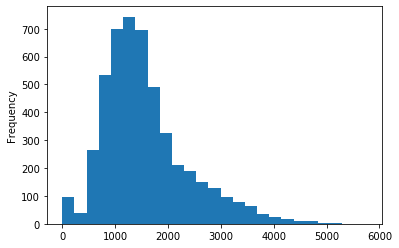

In [15]:
lyrics_db['Length'].plot.hist(bins=25)

In [16]:
lyrics_db.describe()

,Rank,Year,Length
count,4912.000000,4912.000000,4912.000000
mean,50.440350,1990.195847,1568.194829
std,28.820238,14.702657,811.688713
min,1.000000,1965.000000,1.000000
25%,26.000000,1978.000000,1024.750000
50%,50.500000,1990.000000,1408.500000
75%,75.000000,2003.000000,1926.250000
max,100.000000,2015.000000,5758.000000


In [17]:
# pip install -U spacy && python -m spacy download en

In [18]:
import spacy

In [19]:
nlp = spacy.load('en')

In [20]:
tokens = []
lemma = []
pos = []

for doc in nlp.pipe(lyrics_db['Lyrics'].astype('unicode').values, batch_size=50,
                        n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

lyrics_db['lyrics_tokens'] = tokens
lyrics_db['lyrics_lemma'] = lemma
lyrics_db['lyrics_pos'] = pos

In [21]:
lyrics_db.head()

,Rank,Song,Artist,Year,Lyrics,Length,lyrics_tokens,lyrics_lemma,lyrics_pos
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,662,"[sam, the, sham, miscellaneous, wooly, bully, ...","[sam, the, sham, miscellaneous, wooly, bully, ...","[PROPN, DET, ADJ, ADJ, PROPN, PROPN, PROPN, PR..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,995,"[ , sugar, pie, honey, bunch, you, know, that,...","[ , sugar, pie, honey, bunch, -PRON-, know, th...","[SPACE, PROPN, PROPN, PROPN, NOUN, PRON, VERB,..."
2,3,i cant get no satisfaction,the rolling stones,1965,,2,[ ],[ ],[SPACE]
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,692,"[ , when, i, woke, up, this, morning, you, wer...","[ , when, i, wake, up, this, morning, -PRON-, ...","[SPACE, ADV, PRON, VERB, ADP, DET, NOUN, PRON,..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1173,"[ , you, never, close, your, eyes, anymore, wh...","[ , -PRON-, never, close, -PRON-, eye, anymore...","[SPACE, PRON, ADV, VERB, PRON, NOUN, ADV, ADV,..."


In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [23]:
lyrics_db['lyrics_tokens'].apply(lambda x: [item for item in x if item not in stop])

0       [sam, sham, miscellaneous, wooly, bully, wooly...
1       [ , sugar, pie, honey, bunch, know, love, ca, ...
2                                                    [  ]
3       [ , woke, morning, mind, mind, got, troubles, ...
4       [ , never, close, eyes, anymore, kiss, lips, t...
5       [ , alone, life, making, lonely, always, go, d...
6       [help, need, somebody, help, anybody, help, kn...
7       [carterlewis, every, time, see, lookin, way, b...
8       [ , saw, crying, chapel, tears, shed, tears, j...
9       [got, sunshine, cloudy, day, cold, outside, go...
10      [well, since, put, doin, head, come, late, nig...
11      [ , trailer, sale, rent, rooms, let, fifty, ce...
12      [let, tell, ya, bout, birds, bees, flowers, tr...
13      [ , hold, hold, never, let, go, told, told, wa...
14      [said, Ì¢shotgun, shoot, em, runs, jerk, baby,...
15      [say, young, nt, know, wo, nt, find, grow, wel...
16      [wants, buy, diamond, ring, took, finger, nt, ...
17            

In [24]:
lyrics_db['lyrics_lemma'].apply(lambda x: [item for item in x if item not in stop])

0       [sam, sham, miscellaneous, wooly, bully, wooly...
1       [ , sugar, pie, honey, bunch, -PRON-, know, lo...
2                                                    [  ]
3       [ , wake, morning, -PRON-, -PRON-, mind, -PRON...
4       [ , -PRON-, never, close, -PRON-, eye, anymore...
5       [ , -PRON-, alone, life, make, -PRON-, lonely,...
6       [help, need, somebody, help, anybody, help, -P...
7       [carterlewis, every, time, see, -PRON-, lookin...
8       [ , -PRON-, see, -PRON-, cry, chapel, tear, sh...
9       [-PRON-, get, sunshine, cloudy, day, -PRON-, c...
10      [well, since, -PRON-, put, -PRON-, -PRON-, hea...
11      [ , trailer, sale, rent, room, let, fifty, cen...
12      [let, -PRON-, tell, ya, bout, bird, bee, flowe...
13      [ , hold, -PRON-, hold, -PRON-, never, let, -P...
14      [say, ì¢shotgun, shoot, -PRON-, -PRON-, run, j...
15      [-PRON-, say, young, -PRON-, know, -PRON-, fin...
16      [want, buy, diamond, ring, -PRON-, take, -PRON...
17            

In [25]:
lyrics_db.head(10)

,Rank,Song,Artist,Year,Lyrics,Length,lyrics_tokens,lyrics_lemma,lyrics_pos
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,662,"[sam, the, sham, miscellaneous, wooly, bully, ...","[sam, the, sham, miscellaneous, wooly, bully, ...","[PROPN, DET, ADJ, ADJ, PROPN, PROPN, PROPN, PR..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,995,"[ , sugar, pie, honey, bunch, you, know, that,...","[ , sugar, pie, honey, bunch, -PRON-, know, th...","[SPACE, PROPN, PROPN, PROPN, NOUN, PRON, VERB,..."
2,3,i cant get no satisfaction,the rolling stones,1965,,2,[ ],[ ],[SPACE]
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,692,"[ , when, i, woke, up, this, morning, you, wer...","[ , when, i, wake, up, this, morning, -PRON-, ...","[SPACE, ADV, PRON, VERB, ADP, DET, NOUN, PRON,..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1173,"[ , you, never, close, your, eyes, anymore, wh...","[ , -PRON-, never, close, -PRON-, eye, anymore...","[SPACE, PRON, ADV, VERB, PRON, NOUN, ADV, ADV,..."
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1333,"[ , when, you, re, alone, and, life, is, makin...","[ , when, -PRON-, be, alone, and, life, be, ma...","[SPACE, ADV, PRON, VERB, ADJ, CCONJ, NOUN, AUX..."
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,1089,"[help, i, need, somebody, help, not, just, any...","[help, i, need, somebody, help, not, just, any...","[NOUN, PRON, VERB, PRON, VERB, PART, ADV, PRON..."
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,1052,"[carterlewis, every, time, i, see, you, lookin...","[carterlewis, every, time, i, see, -PRON-, loo...","[PROPN, DET, NOUN, PRON, VERB, PRON, VERB, PRO..."
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,738,"[ , you, saw, me, crying, in, the, chapel, the...","[ , -PRON-, see, -PRON-, cry, in, the, chapel,...","[SPACE, PRON, VERB, PRON, VERB, ADP, DET, NOUN..."
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,680,"[i, ve, got, sunshine, on, a, cloudy, day, whe...","[-PRON-, have, get, sunshine, on, a, cloudy, d...","[PRON, VERB, VERB, NOUN, ADP, DET, ADJ, NOUN, ..."


In [26]:
lyrics_db.to_csv('proc_lyrics.csv')

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
lyrics_db['lyrics_lemma'] = [" ".join(lyric) for lyric in lyrics_db['lyrics_lemma'].values]

In [30]:
bow_transformer = CountVectorizer().fit(lyrics_db['lyrics_lemma'])

In [31]:
print(len(bow_transformer.vocabulary_))

37916


In [32]:
song222 = (lyrics_db['lyrics_lemma'][221])

In [33]:
song222

'-PRON- sit on the dock a fishin in the water uh huh i do not know -PRON- name -PRON- s the fishermans daughter uh huh come on down to -PRON- boat baby come on down where -PRON- can play come on down to -PRON- boat baby come on down well sail away -PRON- smile so nice like -PRON- want to come with -PRON- uh huh but -PRON- s tie to the dock and -PRON- can not get free come on down to -PRON- boat baby fish all day sleep all night father never let -PRON- out of -PRON- sight soon -PRON- be go to have to get -PRON- knife and cut that rope cut that rope then -PRON- can go fishin in -PRON- little red boat make -PRON- happy in -PRON- little red boat so come on down to -PRON- boat baby'

In [34]:
bow222 = bow_transformer.transform([song222])

In [35]:
print(bow222)

  (0, 1121)	2
  (0, 1494)	2
  (0, 2319)	1
  (0, 2585)	4
  (0, 3258)	1
  (0, 4317)	6
  (0, 5216)	1
  (0, 5469)	3
  (0, 6811)	7
  (0, 7794)	2
  (0, 8139)	1
  (0, 8163)	1
  (0, 9144)	1
  (0, 9167)	2
  (0, 9542)	6
  (0, 11396)	1
  (0, 11845)	1
  (0, 11850)	1
  (0, 11851)	2
  (0, 12489)	1
  (0, 13049)	2
  (0, 13411)	2
  (0, 14542)	1
  (0, 14672)	1
  (0, 15951)	3
  :	:
  (0, 23223)	1
  (0, 23640)	7
  (0, 24207)	1
  (0, 25317)	1
  (0, 25940)	21
  (0, 26617)	2
  (0, 27546)	2
  (0, 27878)	1
  (0, 29313)	1
  (0, 29484)	1
  (0, 29671)	1
  (0, 29821)	1
  (0, 29944)	2
  (0, 30208)	1
  (0, 32248)	2
  (0, 32328)	4
  (0, 32356)	1
  (0, 32833)	1
  (0, 33090)	8
  (0, 34240)	3
  (0, 35400)	1
  (0, 35527)	1
  (0, 35770)	1
  (0, 35920)	1
  (0, 36379)	1


In [36]:
bow_transformer.get_feature_names()[9542]

'down'

In [37]:
lyrics_bow = bow_transformer.transform(lyrics_db['lyrics_lemma'])

In [38]:
lyrics_bow.shape

(4912, 37916)

In [39]:
import numpy as np

In [40]:
lyrics_bow.nnz

474593

In [41]:
(lyrics_bow.nnz)/(4912 * 37916)

0.0025482407450998315

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
tfidf_transformer = TfidfTransformer().fit(lyrics_bow)

In [44]:
tfidf_lyrics = tfidf_transformer.transform(lyrics_bow)

In [45]:
tfidf_lyrics

<4912x37916 sparse matrix of type '<class 'numpy.float64'>'
	with 474593 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.linear_model import LinearRegression

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
from sklearn import metrics

In [84]:
model = LinearRegression()

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=4)

In [86]:
X = tfidf_lyrics
y = lyrics_db['Rank']

In [87]:
model.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_pred = model.predict(x_test)

In [90]:
y_predict = model.predict(x_train)

In [91]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

122.36264786354361

In [92]:
np.sqrt(metrics.mean_squared_error(y_train,y_predict))

6.219292113579896

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
model.intercept_

53.076927034788625

In [95]:
model.score(X,y)

-2.6454196861755284

In [96]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
 

In [97]:
df1

,Actual,Predicted
486,88,22.613573
2873,75,0.738765
2381,83,50.377555
4402,4,28.999999
231,32,3.309437
3625,27,41.000014
234,35,41.723547
2474,76,44.150938
424,26,40.322903
2798,100,180.402219


In [98]:
tfidf_lyrics_df = pd.DataFrame(tfidf_lyrics.toarray())

In [99]:
tfidf_lyrics_df.shape

(4912, 37916)

In [355]:
tfidf_lyrics_df.columns

RangeIndex(start=0, stop=37916, step=1)

In [151]:
from nltk.collocations import *

In [152]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [153]:
lyrics_finder = BigramCollocationFinder.from_words(all_words_stopped)

In [154]:
lyrics_scored = lyrics_finder.score_ngrams(bigram_measures.raw_freq)

In [155]:
lyrics_scored[:50
            ]

[(('wan', 'na'), 0.005469835583649931),
 (('gon', 'na'), 0.005220841599665866),
 (('oh', 'oh'), 0.003500832466061661),
 (('got', 'ta'), 0.0022157022261439095),
 (('yeah', 'yeah'), 0.0019724454307309064),
 (('dont', 'know'), 0.0018875350398791977),
 (('la', 'la'), 0.0017877079587427294),
 (('na', 'na'), 0.0015673999176139721),
 (('im', 'gon'), 0.0013711880684836725),
 (('love', 'love'), 0.0011692390307823115),
 (('dont', 'want'), 0.0009386040502256436),
 (('let', 'go'), 0.0009225399222266718),
 (('baby', 'baby'), 0.0009087706696561244),
 (('dont', 'wan'), 0.0008846744776576666),
 (('ive', 'got'), 0.0007148536959542494),
 (('hey', 'hey'), 0.0006976421302410652),
 (('know', 'im'), 0.0006941998170984284),
 (('get', 'get'), 0.0006437125576730881),
 (('da', 'da'), 0.000631090742816753),
 (('oh', 'yeah'), 0.0006219112411030548),
 (('feel', 'like'), 0.0005828983588198373),
 (('cause', 'im'), 0.0005519175405361059),
 (('na', 'get'), 0.0005392957256797708),
 (('know', 'youre'), 0.000525526473109

In [156]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [157]:
tri_finder = TrigramCollocationFinder.from_words(all_words_stopped)

In [158]:
tri_lyrics_scored = tri_finder.score_ngrams(trigram_measures.raw_freq)

In [159]:
tri_lyrics_scored[:25]

[(('oh', 'oh', 'oh'), 0.0021422662124343235),
 (('la', 'la', 'la'), 0.0014285599541942866),
 (('im', 'gon', 'na'), 0.0012139891016365904),
 (('na', 'na', 'na'), 0.00120366216220868),
 (('yeah', 'yeah', 'yeah'), 0.0010464631953615979),
 (('dont', 'wan', 'na'), 0.0008846744776576666),
 (('youre', 'gon', 'na'), 0.00048307127768336915),
 (('love', 'love', 'love'), 0.00043946864454330256),
 (('da', 'da', 'da'), 0.0003476736274063203),
 (('hey', 'hey', 'hey'), 0.0003476736274063203),
 (('get', 'get', 'get'), 0.0003155453714083765),
 (('gon', 'na', 'get'), 0.000313250495979952),
 (('shake', 'shake', 'shake'), 0.0003121030582657397),
 (('baby', 'baby', 'baby'), 0.00030866074512310286),
 (('gon', 'na', 'make'), 0.000305218431980466),
 (('wan', 'na', 'see'), 0.0003006286811236169),
 (('never', 'gon', 'na'), 0.00027423761369673453),
 (('got', 'ta', 'get'), 0.00026505811198303627),
 (('ooh', 'ooh', 'ooh'), 0.00026046836112618714),
 (('wan', 'na', 'know'), 0.000243256795413003),
 (('wan', 'na', 'ge